In [180]:
import numpy as np
import pandas as pd
import unittest
import sklearn
from unittest.mock import patch
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

In [182]:
class DataProcessor:
    def __init__(self, file_path):
        self.dataset = pd.read_csv(file_path)
    
    def clean_data(self):
        
        for col in self.dataset.select_dtypes(include=["float", "int"]).columns:
            self.dataset[col] = self.dataset[col].astype(str).str.replace(",", ".").astype(float)
        for col in self.dataset.columns:
            if self.dataset[col].dtype == "object":
                self.dataset[col] = self.dataset[col].str.replace(",", ".").astype("string")
    
    def get_scaled_data(self):
        trainset = self.dataset.iloc[:, 3:4].values
        scaler = MinMaxScaler(feature_range=(0, 1))
        return scaler, scaler.fit_transform(trainset)

In [186]:
class StockPredictor:
    def __init__(self, data_scaled, scaler, time_step=70):  # time_step=70!
        if data_scaled is None:
            raise ValueError("data_scaled cannot be None")
        
        self.time_step = time_step
        self.scaler = scaler
        self.x_train, self.y_train = self.prepare_data(data_scaled)
        self.model = self.build_model()
    
    def prepare_data(self, data):
        x_train, y_train = [], []
        for i in range(self.time_step, len(data)):
            x_train.append(data[i - self.time_step:i, 0])
            y_train.append(data[i, 0])
        return np.array(x_train), np.array(y_train)
    
    def build_model(self):
        model = Sequential([
            LSTM(units=50, return_sequences=True, input_shape=(self.x_train.shape[1], 1)),
            Dropout(0.2),
            LSTM(units=50, return_sequences=True),
            Dropout(0.2),
            LSTM(units=50, return_sequences=True),
            Dropout(0.2),
            LSTM(units=50),
            Dropout(0.2),
            Dense(units=1)
        ])
        model.compile(optimizer='adam', loss='mean_squared_error')
        return model
    
    def train(self, epochs=10, batch_size=32):  
        self.x_train = np.reshape(self.x_train, (self.x_train.shape[0], self.x_train.shape[1], 1))
        self.model.fit(self.x_train, self.y_train, epochs=epochs, batch_size=batch_size)
    
    def predict(self, test_data):
        test_data = np.reshape(test_data, (test_data.shape[0], test_data.shape[1], 1))
        predictions = self.model.predict(test_data)
        return self.scaler.inverse_transform(predictions)

In [188]:
class Visualizer:
    @staticmethod
    def plot_results(real, predicted):
        plt.figure(figsize=(12, 6))
        plt.plot(real, color='red', label='Real Stock Price')
        plt.plot(predicted, color='blue', label='Predicted Stock Price')
        plt.title('Stock Price Prediction')
        plt.xlabel('Time')
        plt.ylabel('Stock Price')
        plt.legend()
        plt.show()

    @staticmethod
    def print_metrics(real, predicted):
        rmse = mean_squared_error(real, predicted, squared=False)
        mae = mean_absolute_error(real, predicted)
        print(f"RMSE: {rmse:.4f}")
        print(f"MAE: {mae:.4f}")

In [190]:
data_processor = DataProcessor("c:/studia/uczenie maszynowe/dom_d (1).csv")
data_processor.clean_data()
scaler, data_scaled = data_processor.get_scaled_data()

# Rozdzielenie danych na treningowe i testowe 
train_data = data_scaled[:3800]  # Trening do indeksu 3800
test_data_full = data_scaled[3800 - 70:]  # Dane testowe z uwzględnieniem okna 70

predictor = StockPredictor(train_data, scaler, time_step=70)
predictor.train(epochs=20, batch_size=32) 

Epoch 1/20


C:\Users\adria\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


117/117 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.0116
Epoch 2/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0017
Epoch 3/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0014
Epoch 4/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0016
Epoch 5/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0016
Epoch 6/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0015
Epoch 7/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0011
Epoch 8/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0010
Epoch 9/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - loss: 0.0011
Epoch 10/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 9.5031e-04
Epoch 11/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0010
Epoch 12/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 8.9140e-04
Epoch 13/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - loss: 8.4783e-04
Epoch 14/20
117/117 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 8.4172e-04
Epoch 15/20
117/117 ━━━━━━━━━━━━━━━━━

In [192]:
# Przygotowanie danych testowych (indeksy 3801-4542)
x_test = []
y_test = []
for i in range(70, len(test_data_full)):  # Okno 70
    x_test.append(test_data_full[i - 70:i, 0])
    y_test.append(test_data_full[i, 0])

x_test = np.array(x_test)
y_test = np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [194]:
# Przewidywanie i wykres
predicted_prices = predictor.predict(x_test)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


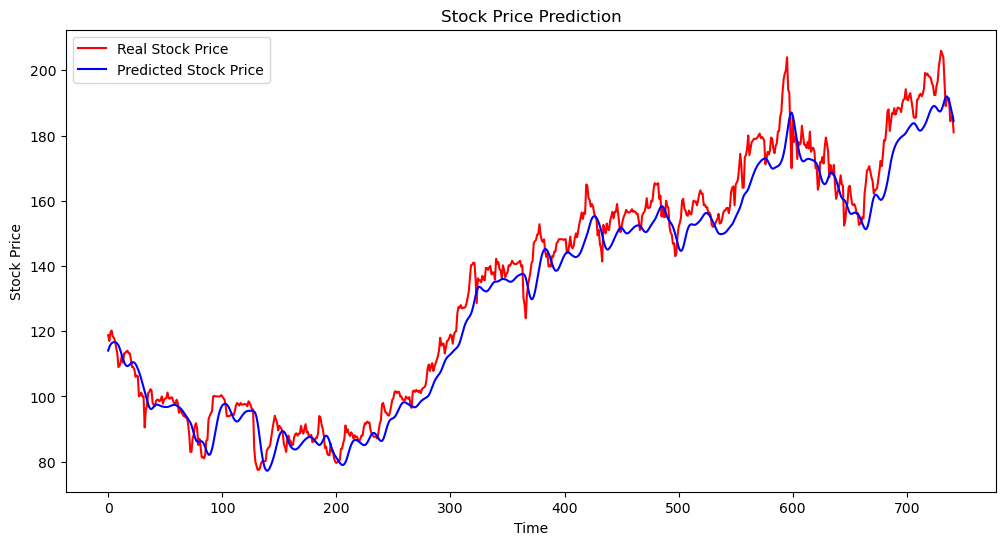

RMSE: 7.0155
MAE: 5.5788


C:\studia\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [196]:
Visualizer.plot_results(real_prices, predicted_prices)
Visualizer.print_metrics(real_prices, predicted_prices)

In [205]:
# Testy
class TestMetrics(unittest.TestCase):
    def test_metrics_calculation(self):
        real = np.array([10.0, 20.0, 30.0])
        predicted = np.array([12.0, 18.0, 28.0])
        
        rmse = root_mean_squared_error(real, predicted)
        mae = mean_absolute_error(real, predicted)
        
        self.assertAlmostEqual(rmse, 2.0, places=6)
        self.assertAlmostEqual(mae, 2.0, places=6)

    def test_perfect_prediction(self):
        real = np.array([5.0, 5.0, 5.0])
        predicted = np.array([5.0, 5.0, 5.0])
        
        rmse = root_mean_squared_error(real, predicted)
        mae = mean_absolute_error(real, predicted)
        
        self.assertEqual(rmse, 0.0)
        self.assertEqual(mae, 0.0)
        

if __name__ == "__main__":
    unittest.main(argv=[''], verbosity=2, exit=False)

test_metrics_calculation (__main__.TestMetrics.test_metrics_calculation) ... ok
test_perfect_prediction (__main__.TestMetrics.test_perfect_prediction) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.004s

OK
